# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [50]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [51]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Python/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [53]:
#return the last 5 rows
df.tail()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31
1897,1478056,120353,Blue Ribbon Sushi,Japanese,19.45,Weekend,Not given,28,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?


In [54]:
#find number of rows
print('Number of Rows:', df.shape[0])
#find number of columns
print('Number of Columns:', df.shape[1])

Number of Rows: 1898
Number of Columns: 9


#### Observations:
Data has:
1898 Rows
| 9 Columns

### **Question 2:** What are the datatypes of the different columns in the dataset?

In [55]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
There are 3 data types:
Float, Interger, and Strings

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method.

In [56]:
#find missing value in each column using isnull()
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations:
No missing data founded. Everything is accounted for.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?


In [57]:
#Finding min,max,count,avg, 25th-50th-75th percentile using .describe()
df['food_preparation_time'].describe()

,food_preparation_time
count,1898.000000
mean,27.371970
std,4.632481
min,20.000000
25%,23.000000
50%,27.000000
75%,31.000000
max,35.000000


#### Observations:
Preparation time stats:

- Min = 20 Minutes
- Average = 27.37 Minutes
- Max = 35 Minutes

### **Question 5:** How many orders are not rated?

In [58]:
#Find all unique values in the dataset
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

In [59]:
#Found value of "Not given" in .unique () function - Now counting them
No_Rate= df[df['rating']== 'Not given']
No_Rate['rating'].value_counts()

,count
rating,
Not given,736


#### Observations:
There are 736 orders without ratings

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.)

##Order ID

In [60]:
#Counting the amount of orders conducted through the app
Order= df['order_id'].nunique()

#printing observation
print('Total amount of order processed = ', Order, 'orders',sep='')

Total amount of order processed = 1898orders


##Customer ID


In [61]:
#Counting the amount of customer using the App
customer = df['customer_id'].nunique()

#printing observation
print ('Total amount of people ordered through the app = ',customer)

Total amount of people ordered through the app =  1200


##Restaurants

In [62]:
#Checking for total counts of restaurant using the app - Use "df.nunique()" for numeric counts - otherwise Python will listed every unique restaurant name in the dataframe
restaurant = df['restaurant_name'].nunique()
print ('Total amount of restaurant utilizing the app = ',restaurant)

Total amount of restaurant utilizing the app =  178


##Cuisine Type


In [63]:
#Count how many cuisine are available to order using "nunique()"
Cuisine_count = df['cuisine_type'].nunique()

#create a list of restaurant
Cuisine = df['cuisine_type'].unique().tolist()

#printing the list
print ('There are', Cuisine_count, 'cuisines available for order \n','Cuisine:', np.array(Cuisine));



There are 14 cuisines available for order 
 Cuisine: ['Korean' 'Japanese' 'Mexican' 'American' 'Indian' 'Italian'
 'Mediterranean' 'Chinese' 'Middle Eastern' 'Thai' 'Southern' 'French'
 'Spanish' 'Vietnamese']


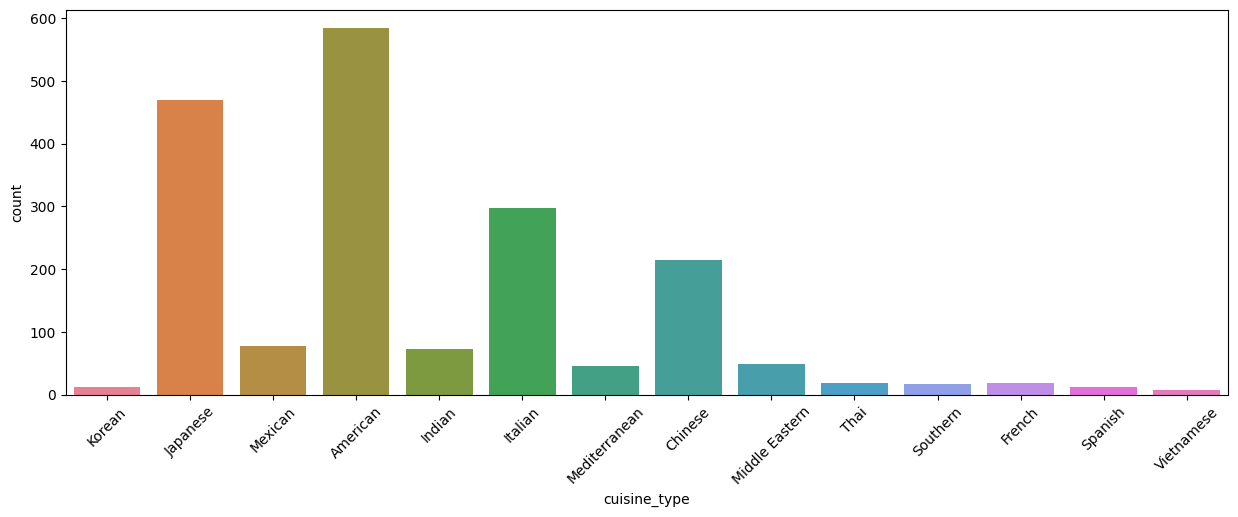

In [64]:
plt.figure(figsize= (15,5))
sns.countplot(data = df, x= 'cuisine_type', hue = 'cuisine_type')
plt.xticks (rotation = 45);

##Observation:
American is the most ordered cuisine through the app with Japanese ranked as the 2nd most popular.

Italian cuisine takes the 3rd place, and Chinese in the 4th place.

Everything else are not that popular and acted as additional options.

##Cost of Order

Most popular dish price = $12.18


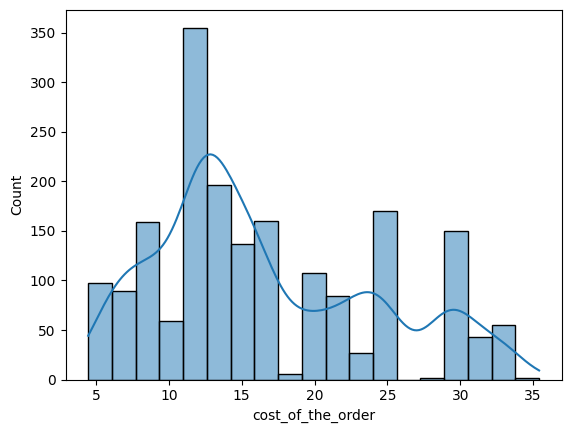

In [65]:
#Showing Cost distribution throughout the app
sns.histplot (data = df, x= 'cost_of_the_order',kde = 'True');
popular_price = df['cost_of_the_order'].mode()
print('Most popular dish price = $', *popular_price, sep='')

<Axes: xlabel='cost_of_the_order'>

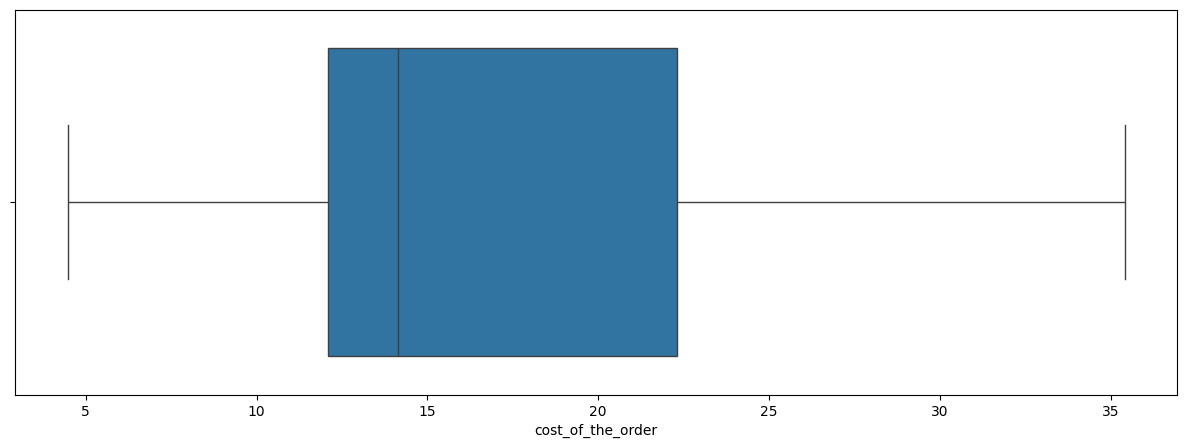

In [66]:
plt.figure (figsize = (15,5))
sns.boxplot(data = df, x = "cost_of_the_order")

In [67]:
Popular_dish = df[df['cost_of_the_order']== 12.18]
Popular_dish.sort_values(by='cuisine_type', ascending=True).head(10)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
744,1478294,390459,Shake Shack,American,12.18,Weekend,Not given,35,29
555,1477133,175290,Shake Shack,American,12.18,Weekend,Not given,26,25
1444,1478147,372415,Five Guys Burgers and Fries,American,12.18,Weekend,Not given,21,19
1681,1477077,40808,Shake Shack,American,12.18,Weekend,4,27,23
710,1478332,146456,Five Guys Burgers and Fries,American,12.18,Weekend,Not given,22,26
723,1478428,53543,The Smile,American,12.18,Weekday,5,29,27
1352,1477433,283331,Dickson's Farmstand Meats,American,12.18,Weekend,5,21,20
786,1477244,47386,Bubby's,American,12.18,Weekday,4,28,31
992,1477294,39334,The Meatball Shop,American,12.18,Weekend,5,22,26
805,1476642,277898,Blue Ribbon Fried Chicken,American,12.18,Weekend,Not given,25,17


##Observation:
###Most popular dish are American cuisine costing about $12.18.

##Day of the week

In [68]:
Weekday = df[df['day_of_the_week'] == 'Weekday']
Weekday_orders = Weekday['day_of_the_week'].value_counts()

Weekend = df[df['day_of_the_week']== 'Weekend']
Weekend_orders = Weekend['day_of_the_week'].value_counts()

ratio = (547/1351)*100

print('Total amount of orders based on days of the week: \n','Weeekend = ', *Weekend_orders, ' orders',sep='');

print('Weekdays =',*Weekday_orders,'orders')

print('The amount of orders on the weekend is ', round(ratio,2), '% more compare to the weekdays',sep='')

Total amount of orders based on days of the week: 
Weeekend = 1351 orders
Weekdays = 547 orders
The amount of orders on the weekend is 40.49% more compare to the weekdays


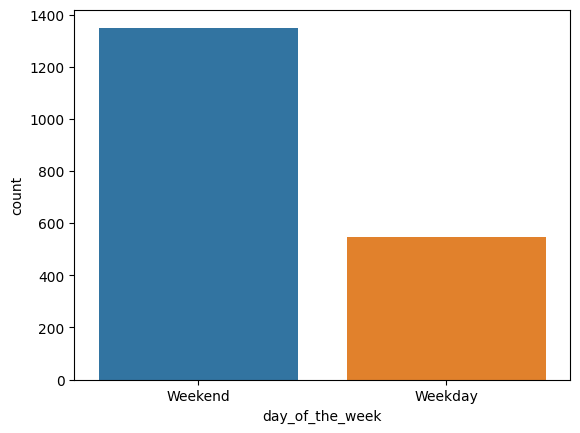

In [69]:
#counting amount of orders weekdays vs weekends
sns.countplot(data = df, x= 'day_of_the_week', hue = 'day_of_the_week');

##Observation:
###Surprisingly, the amount of order on the weekend are statistically higher compare to the weekdays by 40.49%

###Solution = Offer Lunch Special (35% - 50% would be the healthy bracket for discount)

### Benefit - Help increasing traffic on the weekdays. Cheap meal - cleaining dishes - Packing = increase buying power

##Rating


In [70]:
#FIndout what people have been rating on the apps
rating = df['rating'].unique()
print ('Here are the rating founded: \n',rating)

Here are the rating founded: 
 ['Not given' '5' '3' '4']


In [71]:
No_rate= df[df['rating']== 'Not given']
No_rate_count = No_Rate['rating'].value_counts()
Total_No_Rate= (No_rate.shape[0]/df.shape[0])*100
print('Total order that are not rated = ',*No_rate_count, ' Orders (',round(Total_No_Rate,2),'%',')',sep='')

Total order that are not rated = 736 Orders (38.78%)


In [72]:
No_rate['cuisine_type'].mode()

,cuisine_type
0,American


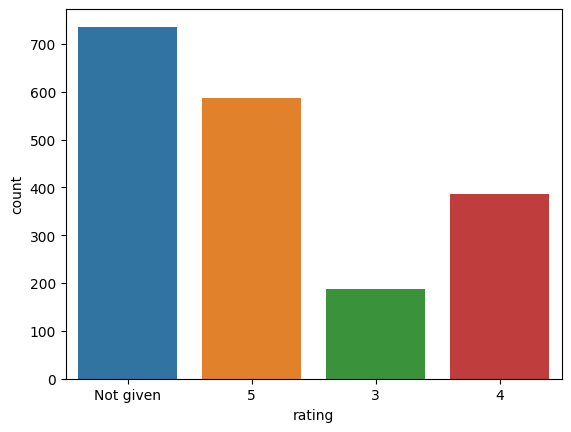

In [73]:
sns.countplot(data=df, x=r'rating', hue = 'rating');
#showing rating graph

##Observation: There are 736 out of 1898 ordres that were not rated - that is 38.78% of the total order. This may hinder the ability of identifying weaknesses.
##Solution: Remind user to rate right after the order has been received. Or we could incetivies users to give us feedbacks

##Prep Time

In [74]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


Food preparation time statistics: 
count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64


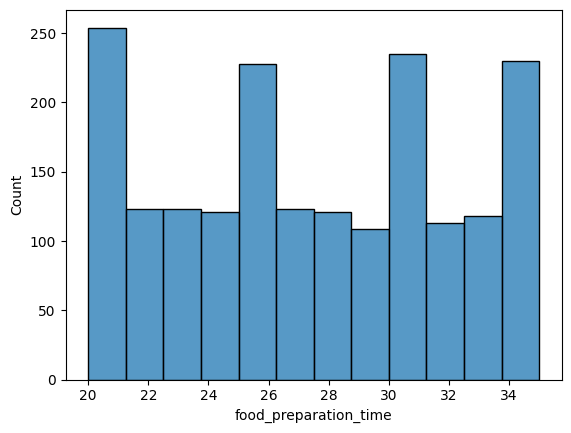

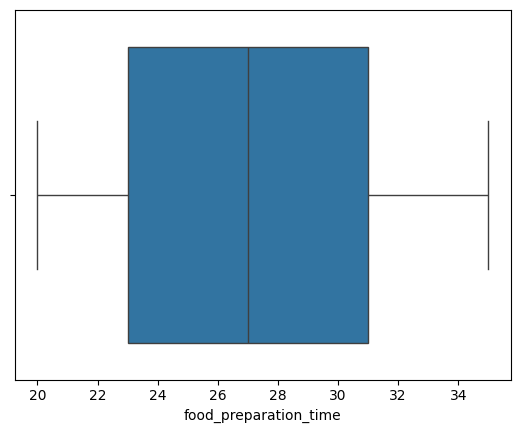

In [75]:
#Finding Food preparation time distribution
prep_time = df['food_preparation_time'].describe()
print ('Food preparation time statistics: \n', prep_time,sep='')

#plotting graphs
sns.histplot (data=df, x='food_preparation_time',);
plt.show()
sns.boxplot (data=df, x='food_preparation_time');
plt.show()

##Delivery Time

Delivery time statistics: 
count    1898.000000
mean       24.161749
std         4.972637
min        15.000000
25%        20.000000
50%        25.000000
75%        28.000000
max        33.000000
Name: delivery_time, dtype: float64


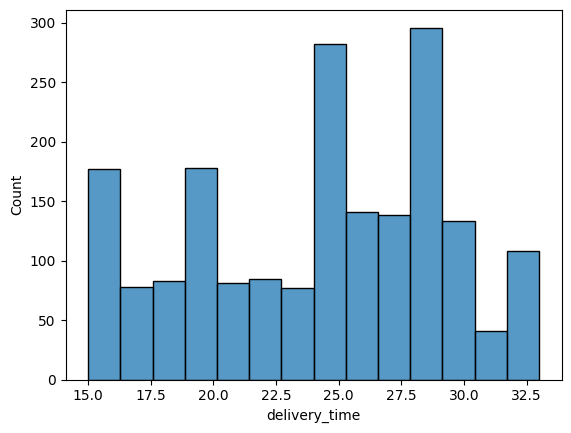

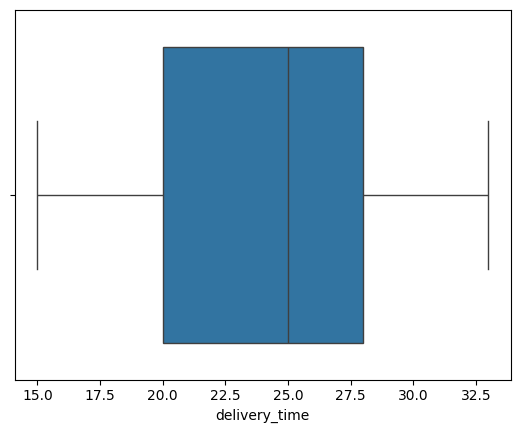

In [76]:
#Finding delivery time distribution
del_time = df['delivery_time'].describe()
print('Delivery time statistics: \n',del_time,sep='')
sns.histplot (data=df, x='delivery_time')
plt.show()
sns.boxplot (data=df, x='delivery_time')
plt.show()

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [77]:
#finding total frequency of order placed with all restaurant using .value_count(). All value will be sorted in a descending order by default - Take the top 5 restaurant using .head(x)
top_5_restaurants = df['restaurant_name'].value_counts().head(5)
print(top_5_restaurants)


restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


#### Observations:
Top 5 restaurants:
- Shake Shack (219 orders)
- The Meatball Shop (132 orders)
- Blue Ribbon Sushi            (119 orders)
- Blue Ribbon Fried Chicken     (96 orders)
- Parm                          (68 orders)

### **Question 8**: Which is the most popular cuisine on weekends?

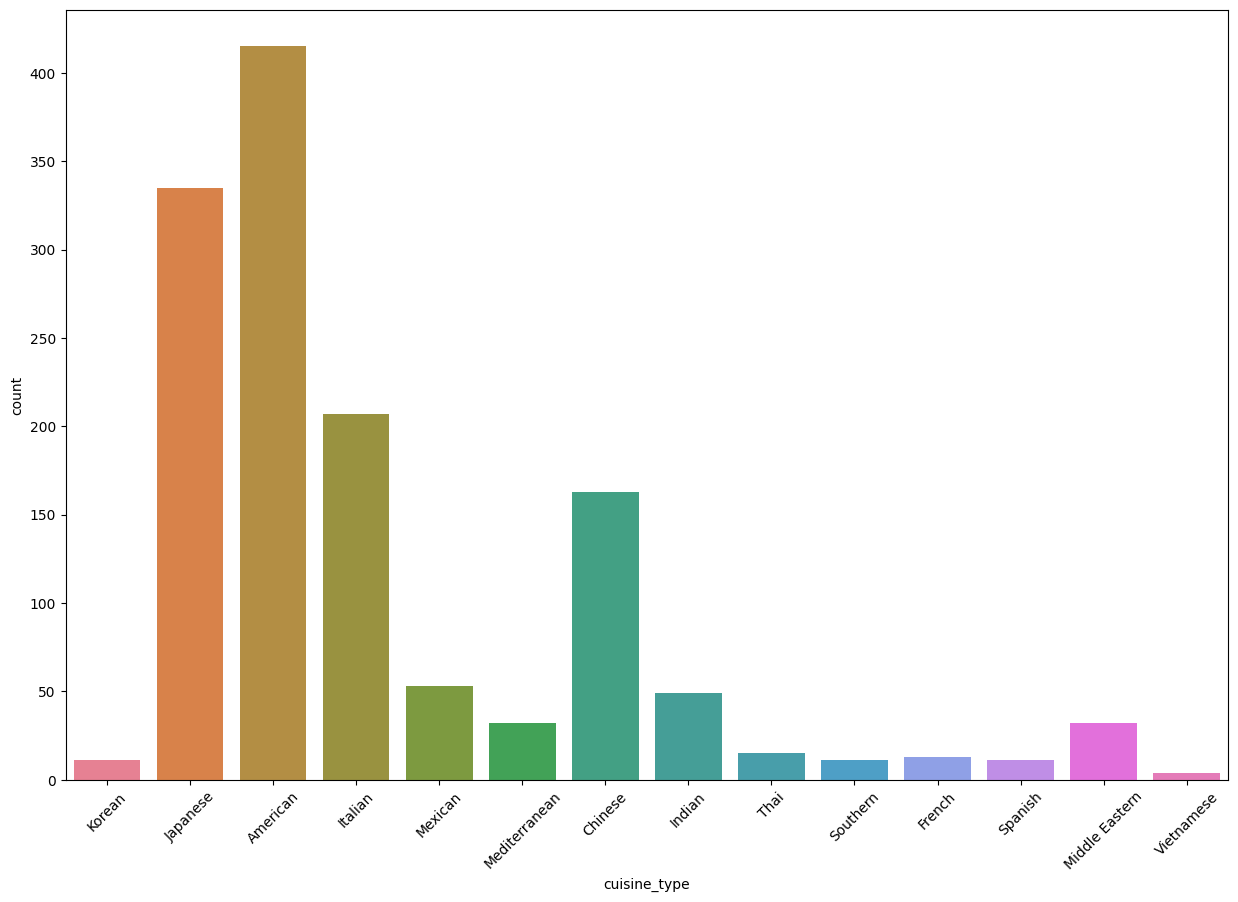

In [78]:
#adjust graph size for better visualization
plt.figure(figsize = (15,10))

#set the value to find all "weekend" order
Popular_weekend = df[df['day_of_the_week'] == 'Weekend']

#find the most frequent cuisine ordered using data.mode()
Popular_weekend['cuisine_type'].mode()

#visualizing the found data
sns.countplot(data = Popular_weekend, x='cuisine_type',hue= 'cuisine_type')
plt.xticks(rotation = 45)
plt.show();

#### Observations:
Most Popular cuisine on the weekend is "**American**" cuisine

### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [79]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [80]:
greater_than_20 = df[df['cost_of_the_order']>20]
percentage_of_20 = (greater_than_20.shape[0]/df.shape[0]) *100
print('Percentage of order cost more than $20 = ', round(percentage_of_20,2),'%',sep='')


Percentage of order cost more than $20 = 29.24%


In [81]:
print ('Total Orders count = ', len(df),' orders',sep='')

Total Orders count = 1898 orders


In [82]:
cost_more_than_20 = len(df[df['cost_of_the_order'] > 20])
print('Amount of orders cost more than $20 = ',cost_more_than_20,' Orders',sep='')

Amount of orders cost more than $20 = 555 Orders


#### Observations:
Percentage of order cost more than $20 = 29.24%
(555 out of 1898)


### **Question 10**: What is the mean order delivery time?

In [83]:
Avg_delivery_time= df['delivery_time'].mean()
print('Average order delivery time = ', round(Avg_delivery_time,2), " Minutes",sep ='')

Average order delivery time = 24.16 Minutes


#### Observations:
Average order delivery time = 24.16 Minutes

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed.

In [84]:
Top_3_customer = df['customer_id'].value_counts().head(3)
print(Top_3_customer)

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64


#### Observations:
Top 3 customer IDs:
- 52832   | 13 orders
- 47440   | 10 orders
- 83287    | 9 orders

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


##Day of the week vs. delivery time

In [85]:
#finding delivery statistics on weekdays
print('Weekday delivery time statistic: \n')
Weekday['delivery_time'].describe()

Weekday delivery time statistic: 



,delivery_time
count,547.000000
mean,28.340037
std,2.891428
min,24.000000
25%,26.000000
50%,28.000000
75%,31.000000
max,33.000000


In [86]:
#finding delivery statistics on weekdays
print('Weekend delivery time statistic: \n')
Weekend['delivery_time'].describe()

Weekend delivery time statistic: 



,delivery_time
count,1351.000000
mean,22.470022
std,4.628938
min,15.000000
25%,18.500000
50%,22.000000
75%,27.000000
max,30.000000


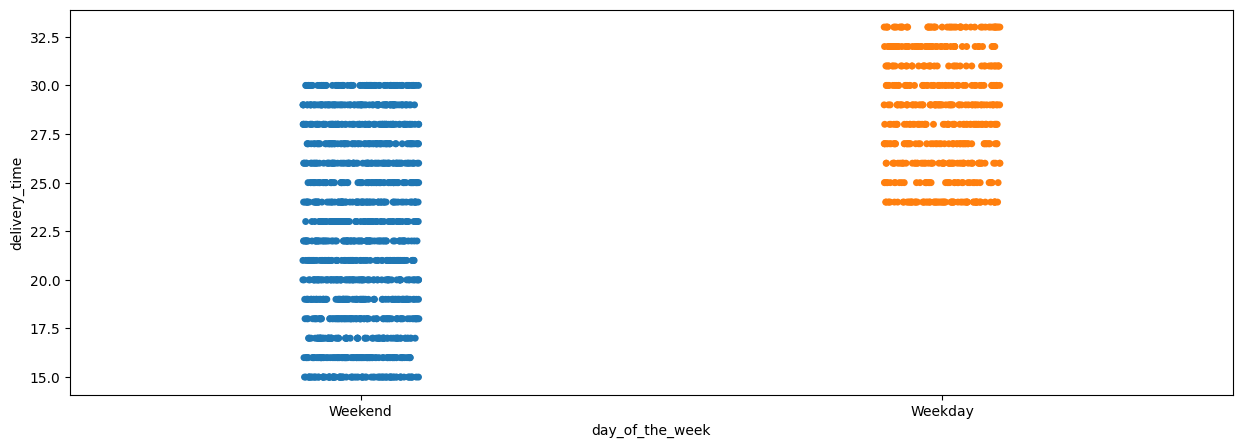

In [87]:
#plotting the correlation using strip plot
plt.figure(figsize = (15,5))
sns.stripplot(data = df, x='day_of_the_week', y='delivery_time', hue='day_of_the_week')
plt.show()

##Revenue by restaurants

In [88]:
#finding top 10 restaurant who generate most  - decending order
top_10 = df.groupby(['restaurant_name','cuisine_type'])['cost_of_the_order'].sum().sort_values(ascending = False).head(10)
print('Top 10 restaurant generate most revenue: \n',top_10)

Top 10 restaurant generate most revenue: 
 restaurant_name                cuisine_type
Shake Shack                    American        3579.53
Blue Ribbon Sushi              Japanese        1903.95
The Meatball Shop              Italian         1821.01
Blue Ribbon Fried Chicken      American        1662.29
Parm                           Italian         1112.76
RedFarm Broadway               Chinese          965.13
RedFarm Hudson                 Chinese          921.21
TAO                            Japanese         834.50
Han Dynasty                    Chinese          755.29
Blue Ribbon Sushi Bar & Grill  Japanese         666.62
Name: cost_of_the_order, dtype: float64


##Cuisine vs. Preptime

#Cuisine vs. Cost of the order


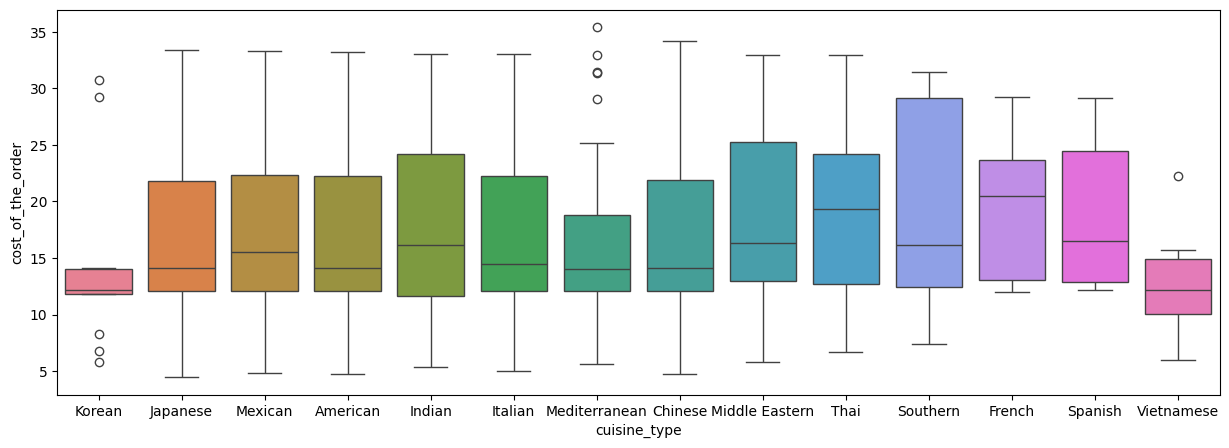

In [89]:
#correlation between cuisine type vs cost of order
plt.figure(figsize = (15,5))
sns.boxplot(data=df, x='cuisine_type', y= 'cost_of_the_order', hue = 'cuisine_type')
plt.show();


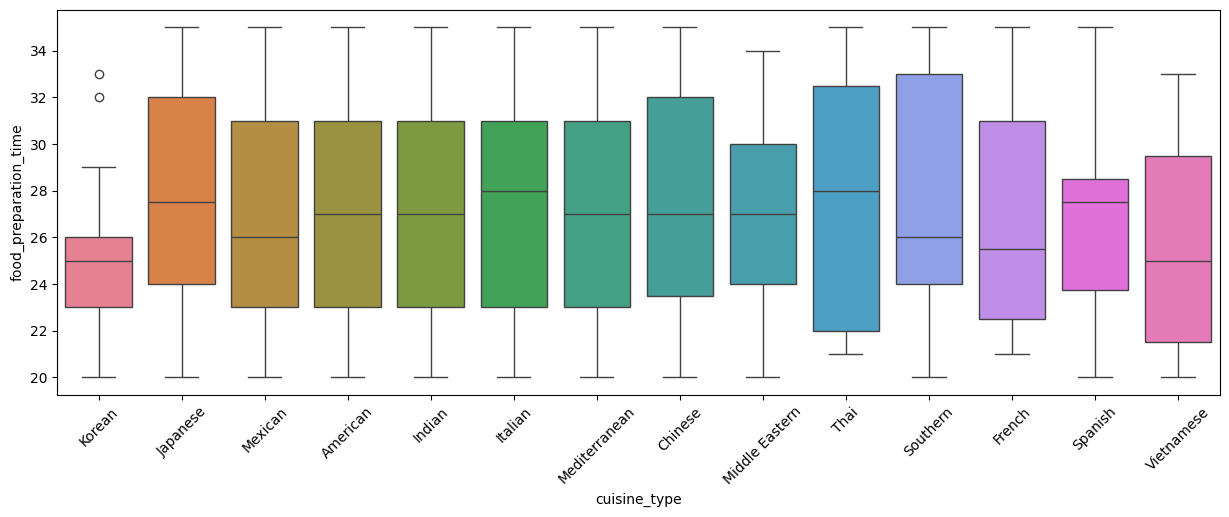

In [90]:
#Correlation between Cuisine Types and Food Prep time
plt.figure(figsize= (15,5))
sns.boxplot(data = df, y= 'food_preparation_time',x = 'cuisine_type', hue = 'cuisine_type');
plt.xticks(rotation = 45);

##Cuisine vs Delivery

<Axes: xlabel='cuisine_type', ylabel='delivery_time'>

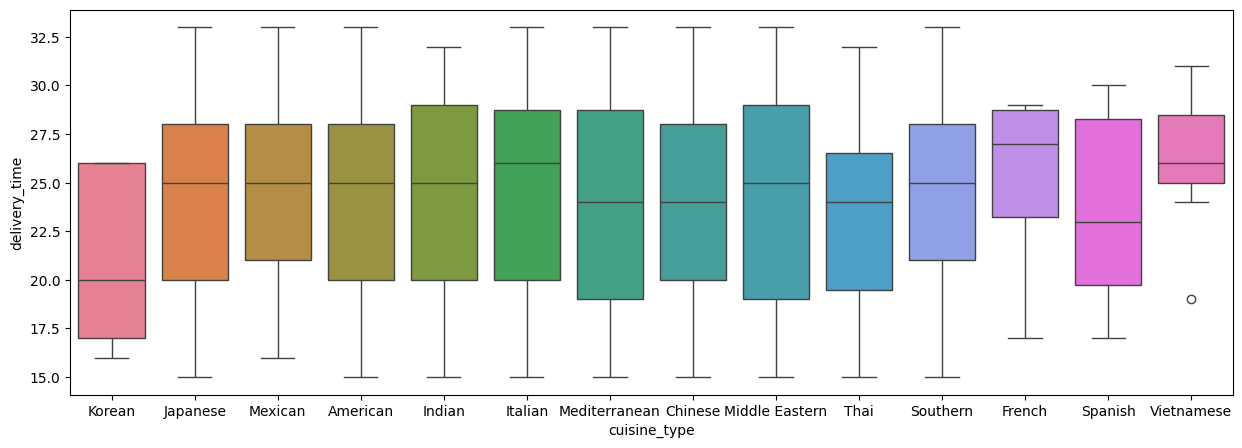

In [91]:
plt.figure (figsize = (15,5))
sns.boxplot(data =df, x='cuisine_type', y= 'delivery_time', hue = 'cuisine_type')

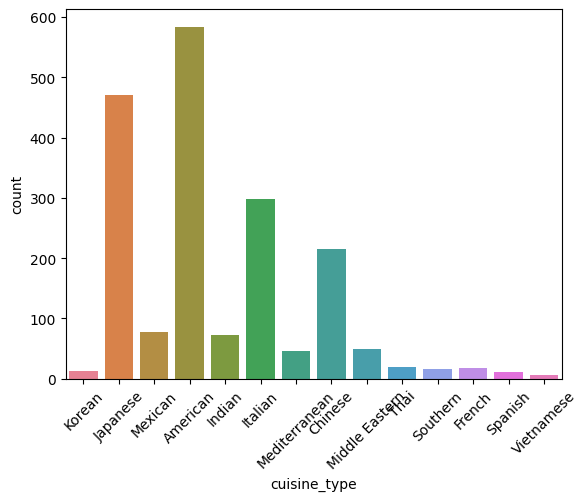

In [92]:
sns.countplot(data = df, x= 'cuisine_type', hue = 'cuisine_type')
plt.xticks (rotation = 45);

##Rating vs Cost of order


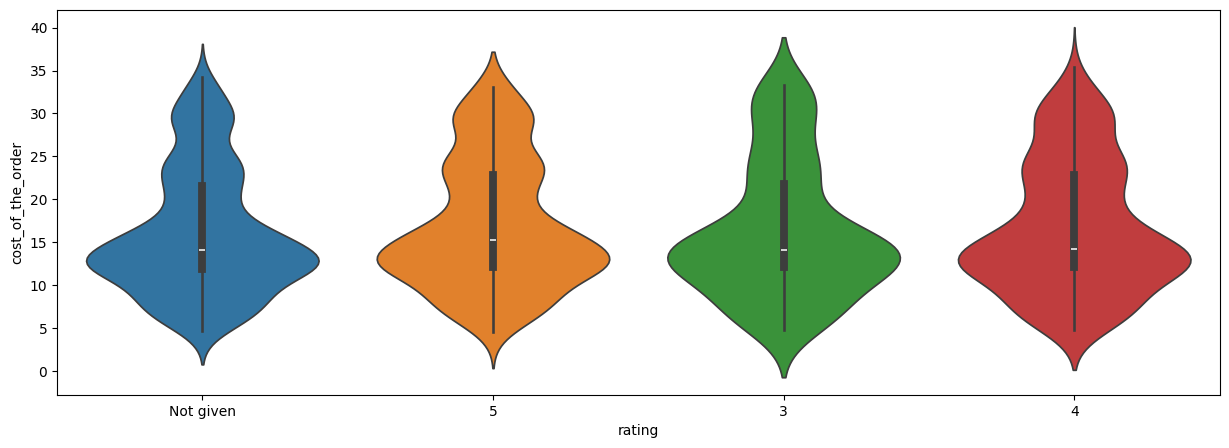

In [93]:
#At What cost gives the best rating?
plt.figure(figsize = (15,5))
sns.violinplot(data=df, x='rating', y= 'cost_of_the_order', hue = 'rating')
plt.show();


##Rating vs  Prep time


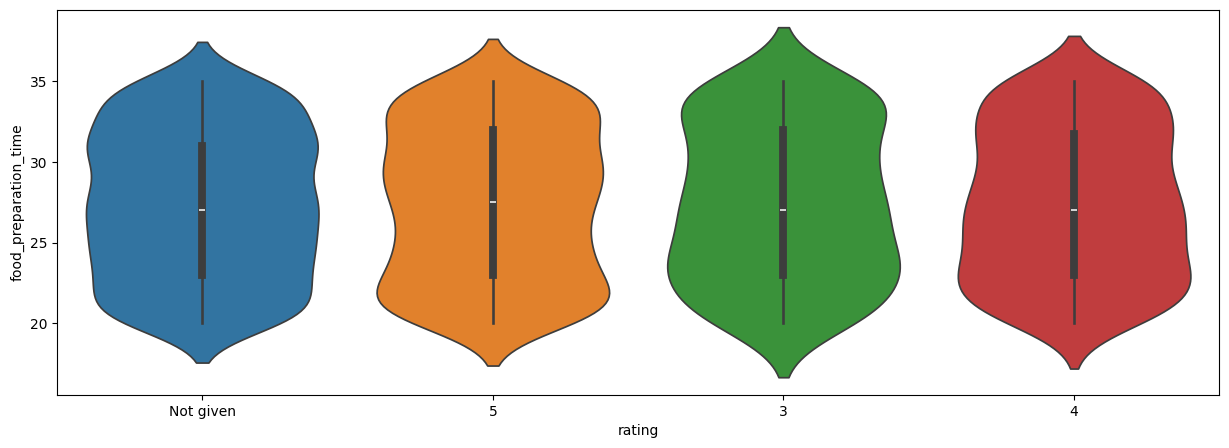

In [94]:
#Correlation between Cuisine Types and Food Prep time
#At what preptime gives the best rating?
plt.figure(figsize= (15,5))
sns.violinplot(data = df, y= 'food_preparation_time',x = 'rating', hue = 'rating');
plt.show()

##Rating vs Delivery Time


In [95]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


##Rating vs. Cuisine

<Axes: xlabel='cuisine_type', ylabel='rating'>

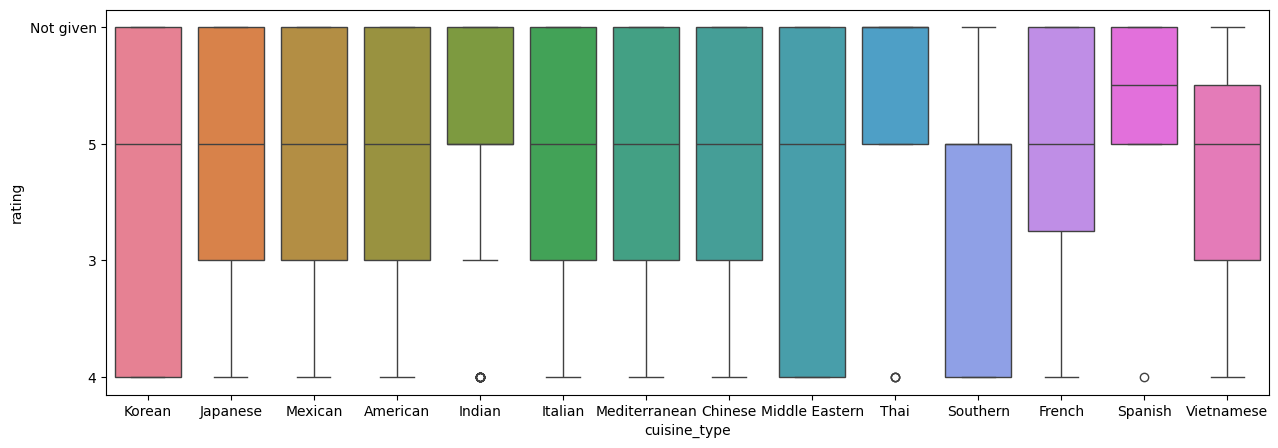

In [96]:
plt.figure (figsize = (15,5))
sns.boxplot(data =df, y='rating', x= 'cuisine_type', hue = 'cuisine_type')

##Rating vs. Day of the week

In [97]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [98]:
print('Common rating given on Weekday = ',*Weekday['rating'].mode())
print('Common rating given on Weekend = ',*Weekend['rating'].mode())

Common rating given on Weekday =  Not given
Common rating given on Weekend =  Not given


<Axes: xlabel='day_of_the_week', ylabel='rating'>

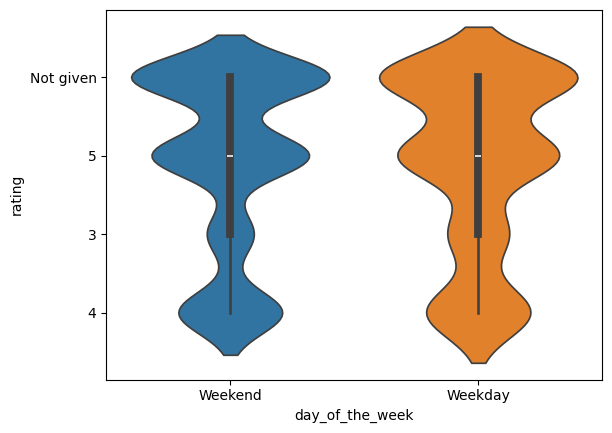

In [99]:
sns.violinplot(data = df, x = 'day_of_the_week', y= 'rating', hue = 'day_of_the_week')

##Cost of order vs Delivery time

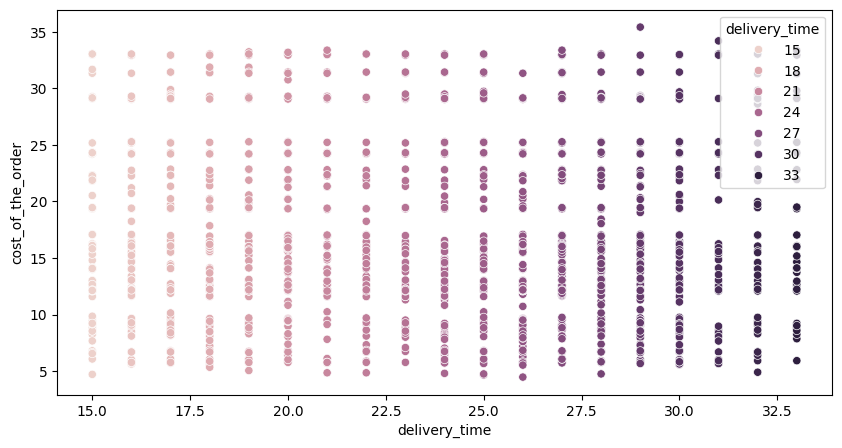

In [100]:
plt.figure (figsize = (10,5))
sns.scatterplot(data= df, x='delivery_time', y='cost_of_the_order',hue = 'delivery_time');
plt.show();

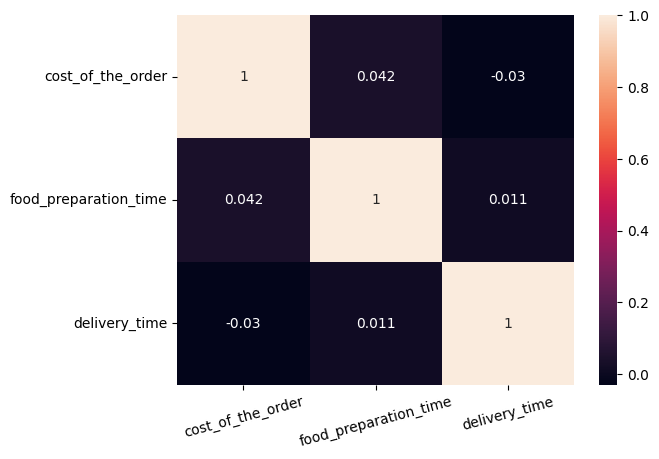

In [101]:
sns.heatmap(data = df[['cost_of_the_order','food_preparation_time','delivery_time']].corr(), annot =True, cbar = True)
plt.xticks(rotation = 15)
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

##Steps:
1 - Fitler restaurant column to 'Not Given'

2 - Conver rating to interger

3- create data frame contains retaurant name with rating counts

4 - set condition to rating > 50 counts

5 - Find the mean rating using .groupby()

6 - Find all rating with mean > 4

In [102]:
#Filter out 'Not given' category and create a copy
rated = df[df['rating'] != 'Not given'].copy()

#convert to interger
rated['rating'] = rated['rating'].astype('int')

#Group data by Restaurant and show their ratings
rating_count = rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False)
rating_count.head(5)

,rating
restaurant_name,
Shake Shack,133
The Meatball Shop,84
Blue Ribbon Sushi,73
Blue Ribbon Fried Chicken,64
RedFarm Broadway,41


In [103]:
#Get restaurant name > 50 counts of rating
rating_50 = rating_count[rating_count > 50]
print('restaurant have over 50 counts of rating:\n',rating_50);

restaurant have over 50 counts of rating:
 restaurant_name
Shake Shack                  133
The Meatball Shop             84
Blue Ribbon Sushi             73
Blue Ribbon Fried Chicken     64
Name: rating, dtype: int64


In [104]:
#filter dataset to > 50 counts of rating
top_rated = rated[rated['restaurant_name'].isin(rating_50.index)]

top_rated_avg = top_rated.groupby(['restaurant_name','cuisine_type'])['rating'].mean()

#calculating average rating within the restaurant that met their conditions
promo_restaurant = top_rated_avg[top_rated_avg > 4].sort_values(ascending = False)

print(promo_restaurant)


restaurant_name            cuisine_type
The Meatball Shop          Italian         4.528571
                           American        4.428571
Blue Ribbon Fried Chicken  American        4.328125
Shake Shack                American        4.278195
Blue Ribbon Sushi          Japanese        4.219178
Name: rating, dtype: float64


## Observations:
###Restaurant will receive promotion:
 (restaurant_name = average rating)

Blue Ribbon Fried Chicken

Blue Ribbon Sushi    

Shake Shack           

The Meatball Shop      

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders.

In [105]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [106]:
#Computing Company charges
def percentage_charge(x):
  if x > 20:                # Order > $20 (25%)
    return x*0.25

  elif x > 5:               # Order > $5 (15%)
    return x*0.15

  else:                     #Others
    return x*0

# Compute Company charges and append new column
df['Revenue'] = df['cost_of_the_order'].apply(percentage_charge)
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [107]:
#Compute company total net revenue
Net_revenue = df['Revenue'].sum()

#printing result
print('Total net revenue of the company across all orders = $',Net_revenue,sep="")

Total net revenue of the company across all orders = $6166.303


#### Observations:
Total net revenue of the company across all orders = $6166.303


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.)

In [108]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [109]:
#add new column to the spreadsheet
df['Total_time'] = df['food_preparation_time'] + df['delivery_time']

#Set condition for the Total_time colunm
Long_order = df[df['Total_time']>60]
percent_over_60 = (Long_order.shape[0] / df.shape[0]) * 100

#print the result
print('About ',round(percent_over_60,2), '% of orders takes more than 60 minutes to reach customers',sep="")


About 10.54% of orders takes more than 60 minutes to reach customers


#### Observations:
About 10.54% of orders takes more than 60 minutes to reach customers

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [110]:
dfwd = df[df['day_of_the_week']== 'Weekday']
Delivery_weekdays= dfwd['delivery_time'].mean()
print('Average delivery on weekdays = ', round(Delivery_weekdays,2), 'Minutes')

dfwe = df[df['day_of_the_week']== 'Weekend']
Delivery_weekends= dfwe['delivery_time'].mean()
print('Average delivery on weekends = ', round(Delivery_weekends,2), 'Minutes')



Average delivery on weekdays =  28.34 Minutes
Average delivery on weekends =  22.47 Minutes


#### Observations:
Average delivery on weekdays =  28.34 Minutes

Average delivery on weekends =  22.47 Minutes

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.)

# ***Conclusions***:


###Order

*   The amount of order on the weekend is 40.49% more than Weekday's order


###Delivery Time:


* Delivery time on the Weekend are  faster than the Weekdays by 6 Minutes on average.
* Fastest delivery on weeekday = 24 minutes vs. Weekend = 15 minutes



##Rating:


*   38.78% of orders does not have any rating
*   That is 736 orders out of 1898 **orders**



# ***Recommendations***:


##Order

*  Offer Lunch Special (35% - 50% would be the healthy bracket for discount). This will help increasing traffic on the weekdays.
*   Lunch special is not just offering Lunch at a lower price. By doing this, we offer lower price meal compare to the regular menu, cut down dishes customer has to do,  and save customer from the hassel of packing their own food. All of that in return saves customer a lot of timeand money combined.

##Delivery time:
- Incentivize driver who would make their delivery under average time of 24 minutes on WEEKDAYS. Because on weekdays, delivery take an extra 6 minutes to be delivered on average.
- Invesitgate Traffic information on weekdays vs Weekend
- Investigate delivery distance from restaurant to destination

#Rating:


*   Incentivize the users to create the urge for giving rating - Because without feedbacks, there are no data for improvements.
*   Example: 5% off their next order



---